# Import Library

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
import os

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Load dataset

In [80]:
df = pd.read_csv("../data/loan_data_set.csv")

In [81]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
df.shape

(614, 13)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning


In [85]:
# Missing Value Check
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
# Handle Missing Values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])



# Duplicate Value Check

In [87]:
df.duplicated().sum()

np.int64(0)

# Data Visualization

#Target variable

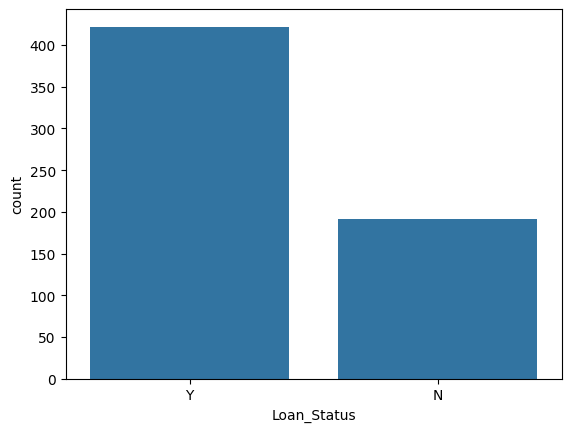

In [88]:
sns.countplot(x='Loan_Status', data=df)
plt.show()

#Neumerical Distribution

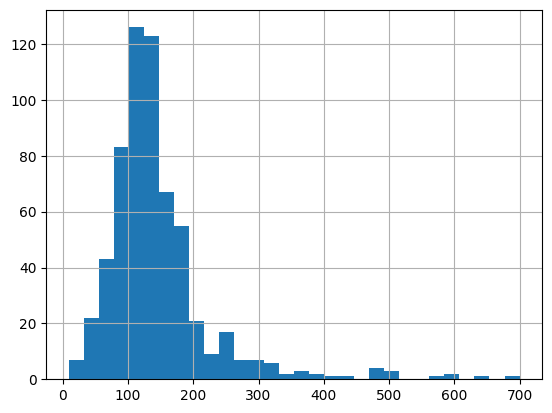

In [89]:
df['LoanAmount'].hist(bins=30)
plt.show()

#Categorical vs Target

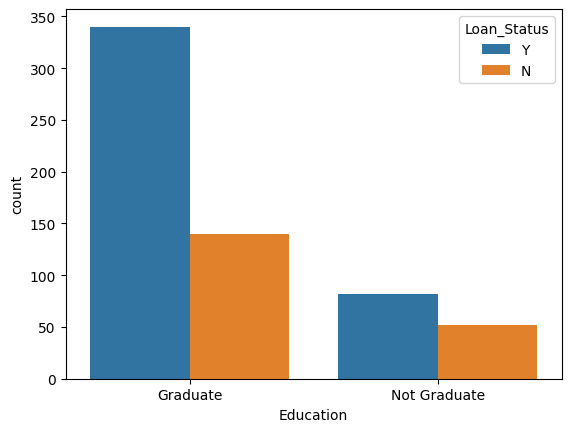

In [90]:
sns.countplot(x='Education', hue="Loan_Status", data=df)
plt.show()

# Outlier Detection ( Without Deleting data)

In [91]:
# Numerical Colums Identify
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

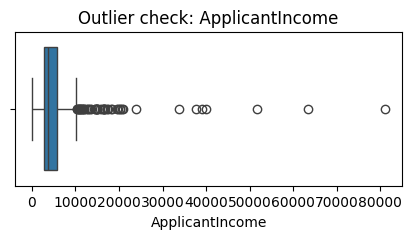

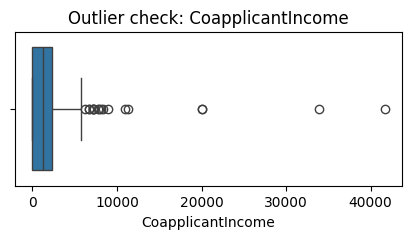

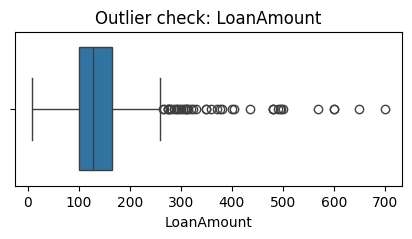

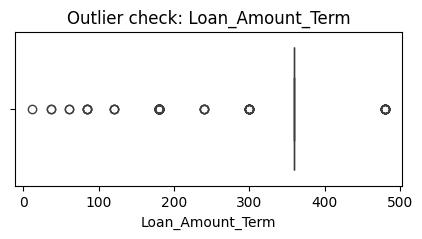

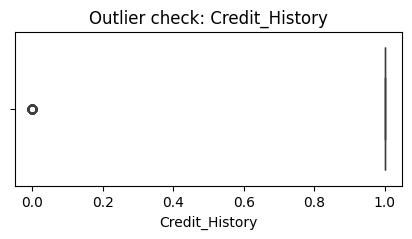

In [92]:
# Outlier Visualization with Boxplot
for col in num_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.show()

# Outlier Identify with IQR Method

In [93]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5  * IQR
    upper = Q3 - 1.5  * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'ApplicantIncome': 604,
 'CoapplicantIncome': 614,
 'LoanAmount': 566,
 'Loan_Amount_Term': 88,
 'Credit_History': 89}

# Log Transformation

In [94]:
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome']+1)
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmount_log'] = np.log(df['LoanAmount']+1)


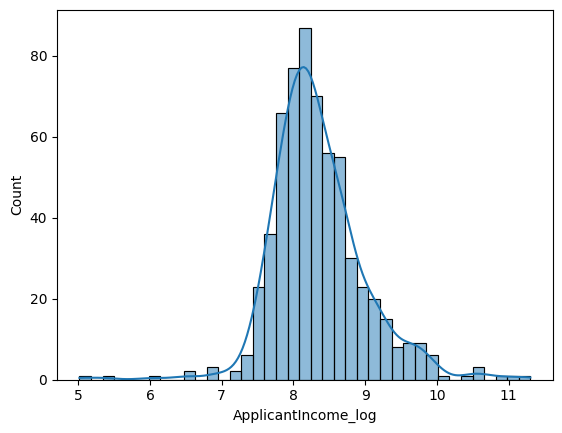

In [95]:
# After Outlier Handling- Visualization
sns.histplot(df['ApplicantIncome_log'], kde=True)
plt.show()

#Drop Unless Feature

In [96]:
df.drop("Loan_ID", axis=1, inplace=True)

# Create New Meaningful Features

In [97]:
# Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'] + 1)

In [98]:
# EMI Feature
df['EMI'] = df['LoanAmount'] / df["Loan_Amount_Term"]
df['EMI_log'] = np.log(df['EMI'] + 1)

In [99]:
# Income to loan Ratio
df['Income_loan_Ratio'] = df['TotalIncome'] / df['LoanAmount']

In [100]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Income_loan_Ratio
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674197,0.000000,4.859812,5849.0,8.674197,0.355556,0.304211,45.695312
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,6091.0,8.714732,0.355556,0.304211,47.585938
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,3000.0,8.006701,0.183333,0.168335,45.454545
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,4941.0,8.505525,0.333333,0.287682,41.175000
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,6000.0,8.699681,0.391667,0.330502,42.553191


# Encoding Categorical Feature

Binary colums lebelencoding

In [101]:
binary_cols = ['Married', 'Self_Employed']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [102]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female':0})
df['Education'] = df['Education'].map({
    'Graduate': 1,
    'Not Graduate':0
})

Multi class One-Hot-Endcoding

In [103]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

Ordinal endcoding 

In [104]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

Convert Target to numerc

In [105]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [106]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Income_loan_Ratio,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,8.674197,0.000000,4.859812,5849.0,8.674197,0.355556,0.304211,45.695312,False,True
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,8.430327,7.319202,4.859812,6091.0,8.714732,0.355556,0.304211,47.585938,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,8.006701,0.000000,4.204693,3000.0,8.006701,0.183333,0.168335,45.454545,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,7.857094,7.765993,4.795791,4941.0,8.505525,0.333333,0.287682,41.175000,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,8.699681,0.000000,4.955827,6000.0,8.699681,0.391667,0.330502,42.553191,False,True


# Feature Selection

In [107]:
corr = df.corr()['Loan_Status'].sort_values(ascending=False)
corr

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married                    0.091478
Education                  0.085884
CoapplicantIncome_log      0.060593
Income_loan_Ratio          0.023870
Gender                     0.017987
ApplicantIncome_log        0.010959
Dependents                 0.010118
TotalIncome_log            0.007232
Self_Employed             -0.003700
ApplicantIncome           -0.004710
EMI                       -0.011757
Loan_Amount_Term          -0.022549
EMI_log                   -0.029218
TotalIncome               -0.031271
LoanAmount                -0.033214
LoanAmount_log            -0.038242
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Name: Loan_Status, dtype: float64

# Final Feature Set

In [108]:
final_features = [
    'Credit_History',
    'Property_Area_Semiurban',
    'Married',
    'Education',
    'CoapplicantIncome_log',
    'ApplicantIncome_log',
    'Income_loan_Ratio',
    'Dependents',
    'Gender'
]

In [109]:
x = df[final_features]
x.head()

,Credit_History,Property_Area_Semiurban,Married,Education,CoapplicantIncome_log,ApplicantIncome_log,Income_loan_Ratio,Dependents,Gender
0,1.0,False,0,1,0.000000,8.674197,45.695312,0,1
1,1.0,False,1,1,7.319202,8.430327,47.585938,1,1
2,1.0,False,1,1,0.000000,8.006701,45.454545,0,1
3,1.0,False,1,0,7.765993,7.857094,41.175000,0,1
4,1.0,False,0,1,0.000000,8.699681,42.553191,0,1


In [110]:
y = df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
# Scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# model Training


In [118]:
model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model_balanced.fit(x_train_scaled, y_train)

y_prob = model_balanced.predict_proba(x_test_scaled)[:,1]
y_pred_60 = (y_prob > 0.6).astype(int)

# Model Test

Accuracy score test

In [120]:
accuracy_score(y_test, y_pred_60)

0.6747967479674797

Confusion Matrix

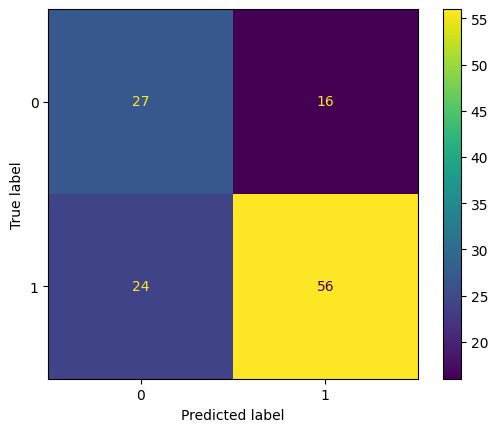

In [122]:
cm = confusion_matrix(y_test, y_pred_60)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

# Classification Report

In [124]:
CR = classification_report(y_test, y_pred_60)
print(CR)

              precision    recall  f1-score   support

           0       0.53      0.63      0.57        43
           1       0.78      0.70      0.74        80

    accuracy                           0.67       123
   macro avg       0.65      0.66      0.66       123
weighted avg       0.69      0.67      0.68       123



In [ ]:
# # model save
# joblib.dump(model_balanced, "loan_model_v1.pkl")  

# # scaler save
# joblib.dump(scaler, "scaler.pkl")
# print("Model and scaler saved successfully")

Model and scaler saved successfully


# Model Save file change

In [130]:
os.makedirs("../model", exist_ok=True)

joblib.dump(model_balanced, "../model/loan_model_v1.pkl")
joblib.dump(scaler, "../model/scaler.pkl")
print("Model saved inside model folder successfully")

Model saved inside model folder successfully


# dupcate model file delete from notebooks folder

In [131]:
files = ["loan_model_v1.pkl", "scaler.pkl"]

for f in files:
    path = f"./{f}"  # Notebook folder
    if os.path.exists(path):
        os.remove(path)
        print(f"{f} deleted from notebooks folder")

loan_model_v1.pkl deleted from notebooks folder
scaler.pkl deleted from notebooks folder
